# 한글 데이터셋 모델 코드

In [104]:
# ## 2-1. Keras 모델 생성 및 훈련
# ## 2-1. Keras model initialization and training

# import keras
# import keras.utils as utils

# from keras import backend as K
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers.convolutional import Convolution2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import EarlyStopping
# from sklearn.preprocessing import LabelEncoder,OneHotEncoder

# batch_size = 128
# epochs = 300
# num_classes = 980

# y_train = utils.to_categorical(y_train, num_classes)
# y_val = utils.to_categorical(y_val, num_classes)

# cb_early_stopping = EarlyStopping(monitor='val_loss', patience=50)

# train_generator = ImageDataGenerator(rescale=1./255, 
#                                      rotation_range=15, 
#                                      width_shift_range=0.15, 
#                                      height_shift_range=0.15, 
#                                      shear_range=0.2, 
#                                      zoom_range=[0.8, 1.2])

# val_generator = ImageDataGenerator(rescale=1./255)

# train_data_flow = train_generator.flow(X_train, y_train, 
#                                        batch_size=batch_size)
# val_data_flow = val_generator.flow(X_val, y_val,
#                                    batch_size=batch_size)

# img_rows, img_cols = 32, 32
# input_shape = (img_rows, img_cols, 3)

# model = Sequential()
# model.add(Convolution2D(32, (3, 3), padding='same',
#                  input_shape=X_train.shape[1:]))
# model.add(Activation('relu'))
# model.add(Convolution2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Convolution2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Dropout(0.50))

# model.add(Convolution2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes))
# model.add(Activation('softmax'))

# RMSprop = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
                     
# model.compile(loss='categorical_crossentropy',
#               optimizer=RMSprop,
#               metrics=['accuracy'])

# hist = model.fit_generator(train_data_flow,
#                            epochs=epochs,
#                            verbose=1,
#                            steps_per_epoch = 230,
#                            validation_data=val_data_flow,
#                            validation_steps = 70,
#                            callbacks=[cb_early_stopping])

# model.save('hand_written_korean_classification.hdf5')

In [10]:
import cv2
import numpy as np
from skimage import io
from skimage.transform import resize
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import load_model

# 한글 데이터셋 모델 불러오기

In [11]:
model = load_model('hand_written_korean_classification.hdf5')

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)       

# 이미지 파일 하나 불러오기

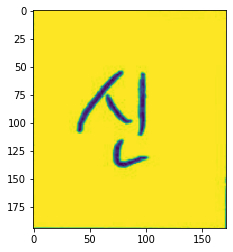

In [13]:
img = cv2.imread('./photo/00047398.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

# 사이즈 32x32로 조절 (데이터셋 파일이 32x32를 기준으로 만들어짐.)

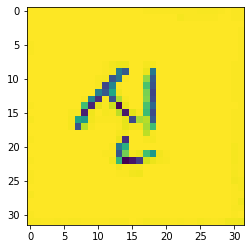

In [15]:
img = cv2.resize(img, (32,32))
plt.imshow(img)
plt.show()

In [16]:
test_x= []
newimg = cv2.imread('./photo/00047398.png',cv2.IMREAD_GRAYSCALE)
test_x.append(newimg)

In [17]:
test_x

[array([[167, 249, 254, ..., 239, 227, 212],
        [171, 251, 255, ..., 254, 250, 240],
        [175, 251, 255, ..., 254, 254, 254],
        ...,
        [228, 243, 251, ..., 247, 238, 160],
        [246, 253, 249, ..., 252, 241, 165],
        [200, 207, 204, ..., 245, 228, 144]], dtype=uint8)]

In [18]:
testx = np.array(test_x)
testx = testx / 255.0

In [19]:
print(model.predict_classes(testx))

ValueError: in user code:

    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1147 predict_function  *
        outputs = self.distribute_strategy.run(
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\training.py:1122 predict_step  **
        return self(x, training=False)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\base_layer.py:886 __call__
        self.name)
    C:\Users\user\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [None, 194, 172]
